# CIFAR - 100

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### Load CIFAR-100 Database

In [1]:
import keras
from keras.datasets import cifar100

# Import train and test data
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

Using TensorFlow backend.


168820736/169001437 [============================>.] - ETA: 0s

### Visualizing Training Images

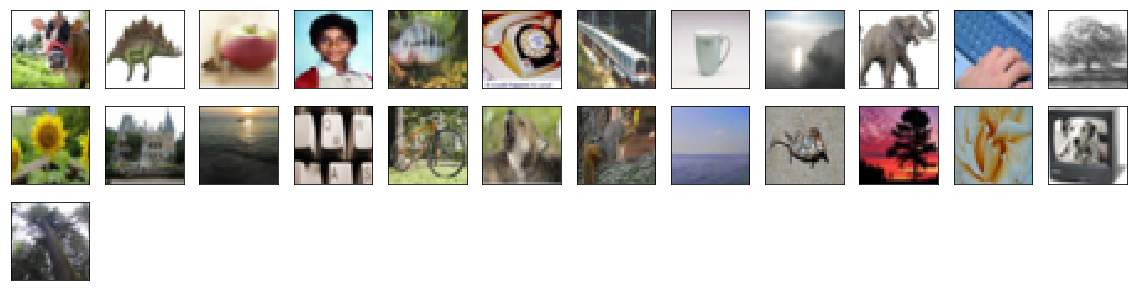

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(25):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

### Rescale Images by dividing each pixel in every Image by 255

In [3]:
# Rescale [0,255] --> [0, 1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Dividing training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print the shape of training set
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### Define the Model Architecture

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
__________

### Compile the model

In [36]:
# compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Train the model

In [37]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=20,validation_data=(X_valid, y_valid), 
                 callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 4.32531, saving model to model.weights.best.hdf5
11s - loss: 4.5426 - acc: 0.0209 - val_loss: 4.3253 - val_acc: 0.0524
Epoch 2/20
Epoch 00001: val_loss improved from 4.32531 to 3.85020, saving model to model.weights.best.hdf5
11s - loss: 4.1165 - acc: 0.0734 - val_loss: 3.8502 - val_acc: 0.1180
Epoch 3/20
Epoch 00002: val_loss improved from 3.85020 to 3.75230, saving model to model.weights.best.hdf5
11s - loss: 3.8356 - acc: 0.1131 - val_loss: 3.7523 - val_acc: 0.1362
Epoch 4/20
Epoch 00003: val_loss improved from 3.75230 to 3.48032, saving model to model.weights.best.hdf5
11s - loss: 3.6524 - acc: 0.1424 - val_loss: 3.4803 - val_acc: 0.1756
Epoch 5/20
Epoch 00004: val_loss improved from 3.48032 to 3.36050, saving model to model.weights.best.hdf5
11s - loss: 3.4762 - acc: 0.1743 - val_loss: 3.3605 - val_acc: 0.1978
Epoch 6/20
Epoch 00005: val_loss improved from 3.36050 to 3.10651, sav

### Load the model with the best accuracy

In [38]:
# load the weights of the model with best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Calculate Classificaition Accuracy on Test Set

In [39]:
# Score trained model
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4342
